<a href="https://colab.research.google.com/github/aseemnarula1/Black_Friday_Sales_Prediction_Model/blob/main/Black_Friday_Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading the train set CSV file to the Google Colab Notebook**

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 25525678 bytes


**Creating the dataframe from the train.csv file**

In [6]:
import pandas as pd
import io as io
import os as os

#Checking the current working directory
print(os.getcwd())

df = pd.read_csv('/content/train.csv')

/content


**Checking the top 5 rows of the dataframe**


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Data Cleaning**


**Checking the null values**

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**Dropping the User_ID and Product ID from the dataset**

In [9]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

**Finding the average of the Product Category 2**

In [10]:
Product_Category_2_Avg_Value = df['Product_Category_2'].mean()

# Finding the Product Category Average Value 


In [11]:
Product_Category_2_Avg_Value

9.842329251122386

In [15]:
df['Product_Category_2'].fillna(Product_Category_2_Avg_Value,inplace=True)

In [16]:
Product_Category_3_Avg_Value = df['Product_Category_3'].mean()

**Finding the average of the Product Category 3**

In [17]:
df['Product_Category_3'].fillna(Product_Category_3_Avg_Value,inplace=True)

In [18]:
df['Product_Category_3'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Product_Category_3, dtype: bool

**Filling with most occurring class**

In [19]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,F,55+,1,C,2,0,20,9.842329,12.668243,365


**Checking again if the dataframe is free of NaN values now**

In [20]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Finding the descriptive statistics of the dataframe 

In [21]:
df.shape

(550068, 10)

In [22]:
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [23]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**EDA **

**Exploratory Data Analysis**

In [24]:
df['Gender'].unique()
print("Different Type of Gender in the dataframe ---->",df['Gender'].unique())

Different Type of Gender in the dataframe ----> ['F' 'M']


In [25]:
print("Different Types of the Age Bracket -----> ",df['Age'].unique())

Different Types of the Age Bracket ----->  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [26]:
print("Different Types of the Occupation -----> ",df['Occupation'].unique())

Different Types of the Occupation ----->  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [27]:
print("Different Types of the City_Category -----> ",df['City_Category'].unique())

Different Types of the City_Category ----->  ['A' 'C' 'B']


In [28]:
print("Different Types of the Marital_Status -----> ",df['Marital_Status'].unique())

Different Types of the Marital_Status ----->  [0 1]


**Removing the '+' plus from the 'Age' column**

In [29]:
df['Age']=(df['Age'].str.strip('+'))

**Removing the '+' plus from the 'Stay_In_Current_City_Years' column**

In [30]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [31]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


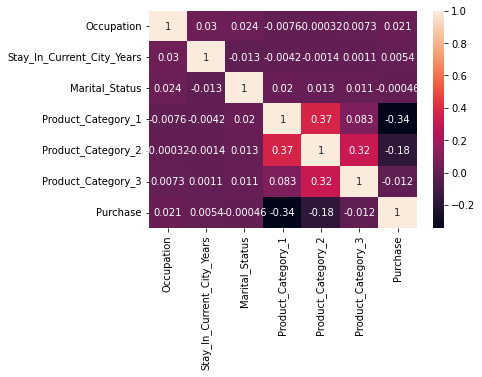

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.heatmap(
    df.corr(),
    annot=True
)

In [33]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


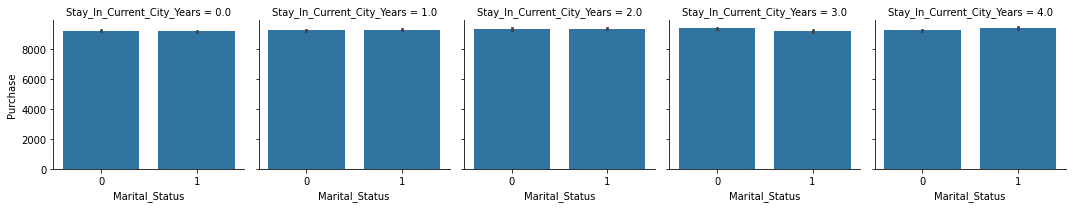

In [34]:
g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

In [35]:
df.groupby('Gender').count()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,
F,135809,135809,135809,135809,135809,135809,135809,135809,135809
M,414259,414259,414259,414259,414259,414259,414259,414259,414259


In [40]:
df_gender_basis = df.groupby('Gender').count()['Age']

In [41]:
df_gender_basis

Gender
F    135809
M    414259
Name: Age, dtype: int64

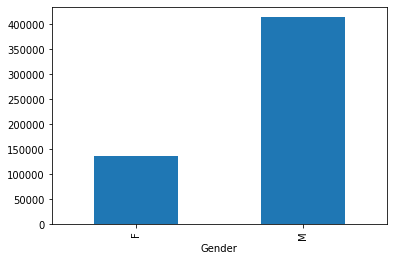

In [42]:
df_gender_basis.plot(kind="bar")


In [43]:
df_Occupation_Basis_Gender = df.groupby('Occupation').count()['Gender']

In [44]:
df_Occupation_Basis_Gender

Occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Gender, dtype: int64

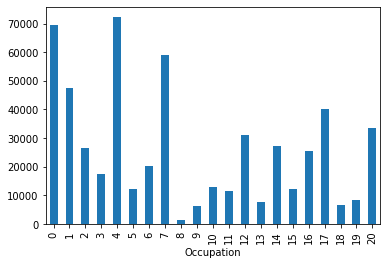

In [45]:
df_Occupation_Basis_Gender.plot(kind="bar")

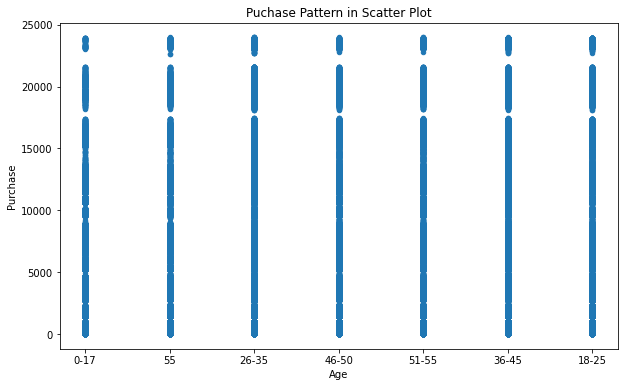

In [46]:
df.plot(x='Age', y='Purchase', kind='scatter',
        figsize=(10,6),
        title='Puchase Pattern in Scatter Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


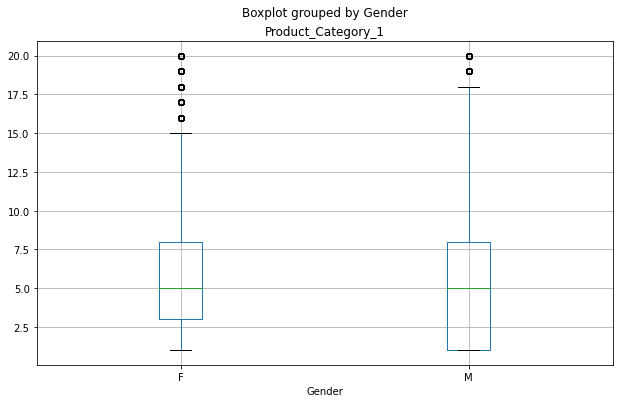

In [47]:
df.boxplot(column='Product_Category_1', by='Gender', figsize=(10,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


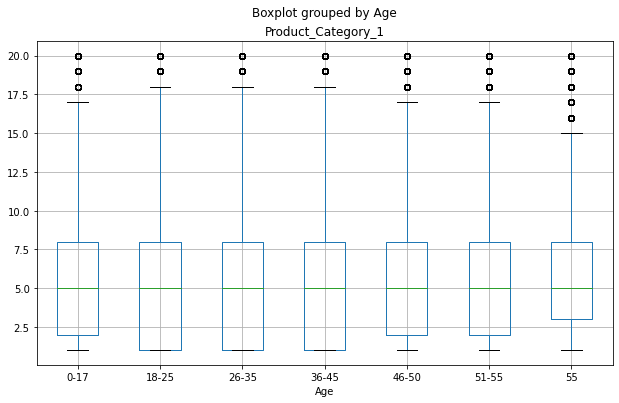

In [48]:
df.boxplot(column='Product_Category_1', by='Age', figsize=(10,6))

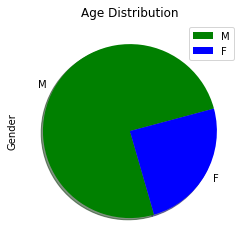

In [49]:
colors = ['Green','Blue']
df['Gender'].value_counts().plot.pie(colors = colors, shadow = True, startangle = 15, title = "Age Distribution")

plt.legend()
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  float64
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 42.0+ MB


In [80]:
# Converting the 'Gender' column in the dataframe to the Binary number of 0 AND 1
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender', 'Age','City_Category'])
print(one_hot_encoded_data.head())

   Occupation  Stay_In_Current_City_Years  ...  City_Category_B  City_Category_C
0          10                         2.0  ...                0                0
1          10                         2.0  ...                0                0
2          10                         2.0  ...                0                0
3          10                         2.0  ...                0                0
4          16                         4.0  ...                0                1

[5 rows x 19 columns]


In [84]:
one_hot_encoded_data.head(5)

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C
0,10,2.0,0,3,9.842329,12.668243,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,10,2.0,0,1,6.000000,14.000000,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,10,2.0,0,12,9.842329,12.668243,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,10,2.0,0,12,14.000000,12.668243,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,16,4.0,0,8,9.842329,12.668243,7969,0,1,0,0,0,0,0,0,1,0,0,1


In [85]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Occupation                  550068 non-null  int64  
 1   Stay_In_Current_City_Years  550068 non-null  float64
 2   Marital_Status              550068 non-null  int64  
 3   Product_Category_1          550068 non-null  int64  
 4   Product_Category_2          550068 non-null  float64
 5   Product_Category_3          550068 non-null  float64
 6   Purchase                    550068 non-null  int64  
 7   Gender_F                    550068 non-null  uint8  
 8   Gender_M                    550068 non-null  uint8  
 9   Age_0-17                    550068 non-null  uint8  
 10  Age_18-25                   550068 non-null  uint8  
 11  Age_26-35                   550068 non-null  uint8  
 12  Age_36-45                   550068 non-null  uint8  
 13  Age_46-50     

In [86]:
x = one_hot_encoded_data[['Occupation','Stay_In_Current_City_Years','Marital_Status','Gender_F','Gender_M']]
y = one_hot_encoded_data[['Purchase']]

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [89]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LinearReg = LinearRegression()
# fitting the training data
LinearReg.fit(x_train,y_train)

LinearRegression()

In [90]:
y_prediction =  LinearReg.predict(x_test)
y_prediction

array([[9564.3326365 ],
       [8776.18494614],
       [8660.75310093],
       ...,
       [9505.13365665],
       [9379.15096036],
       [9379.15096036]])